# Personality Prediction System

### Big five Personality Test

![](https://www.politicalanimalmagazine.com/wp-content/uploads/2019/10/Personal-Crowd-Silhouettes-Human-Group-Of-People-2045498.jpg)

In [1]:
import pandas as pd
from numpy import *
import numpy as np
from sklearn import preprocessing
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import neighbors

In [2]:
data =pd.read_csv('D:/All_datasets/Personality Prediction/train.csv')
data.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [3]:
data.shape

(709, 8)

In [4]:
#To understand the categories of Personality column
data['Personality (Class label)'].unique()

array(['extraverted', 'serious', 'dependable', 'lively', 'responsible'],
      dtype=object)

In [5]:
#To understand the count or distrbution of the data within these columns
data['Gender'].value_counts()
data['Age'].value_counts()
data['openness'].value_counts()
data['neuroticism'].value_counts()
data['conscientiousness'].value_counts()
data['agreeableness'].value_counts()
data['extraversion'].value_counts()

5    172
4    156
6    131
3    101
7     58
2     56
1     35
Name: extraversion, dtype: int64

<AxesSubplot:ylabel='None'>

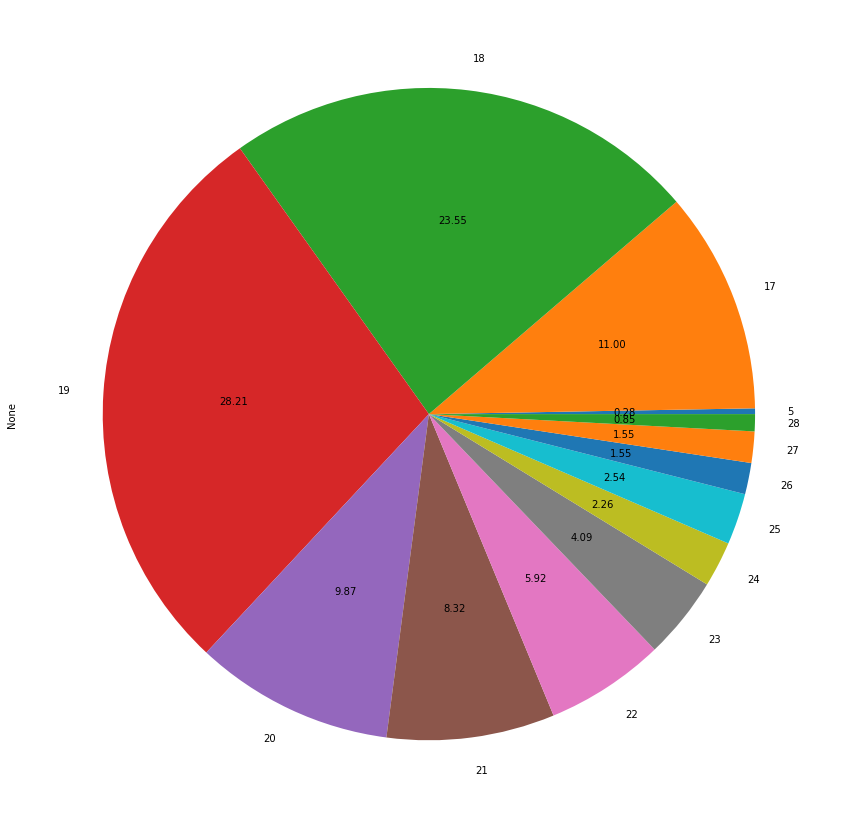

In [6]:
data.groupby('Age').size().plot(kind='pie', autopct='%.2f', figsize=(15,15))

On doing value_counts() for the columns, I observed that the data is more focused on range of 19-20 and the ratio of levels for every trait(openness, neuroticism, etc), have a similar ratio for their own counts

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


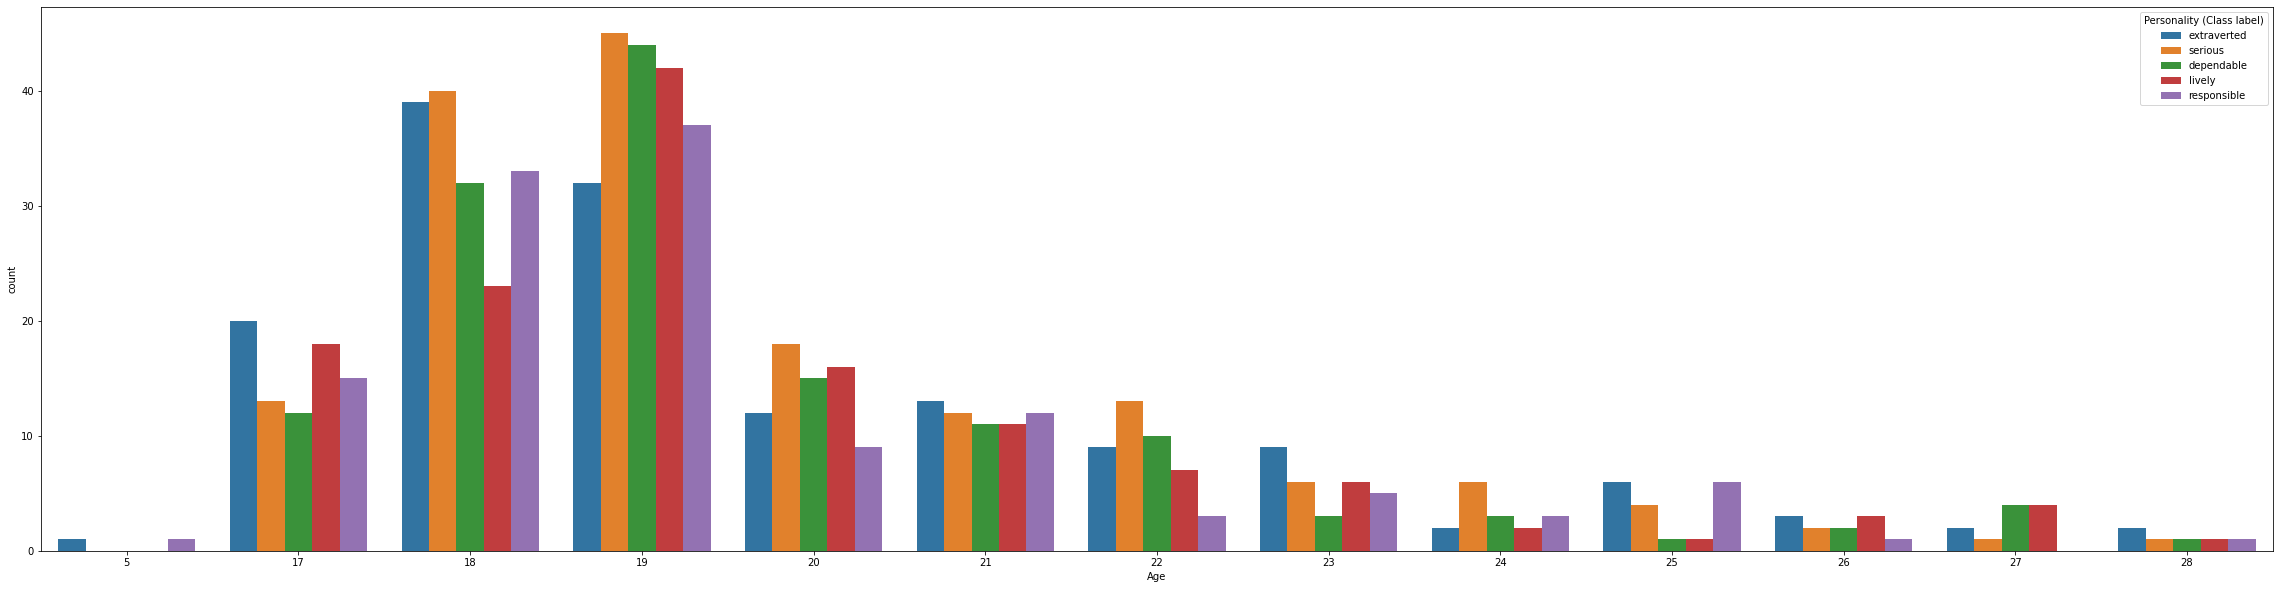

In [7]:
plt.figure(figsize=(40,10))
sns.countplot('Age',hue='Personality (Class label)',data=data)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


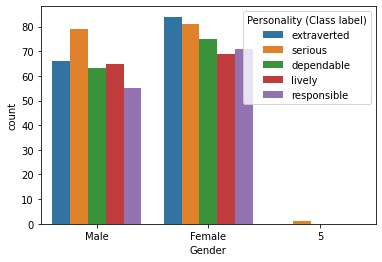

In [8]:
sns.countplot('Gender',hue='Personality (Class label)',data=data)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


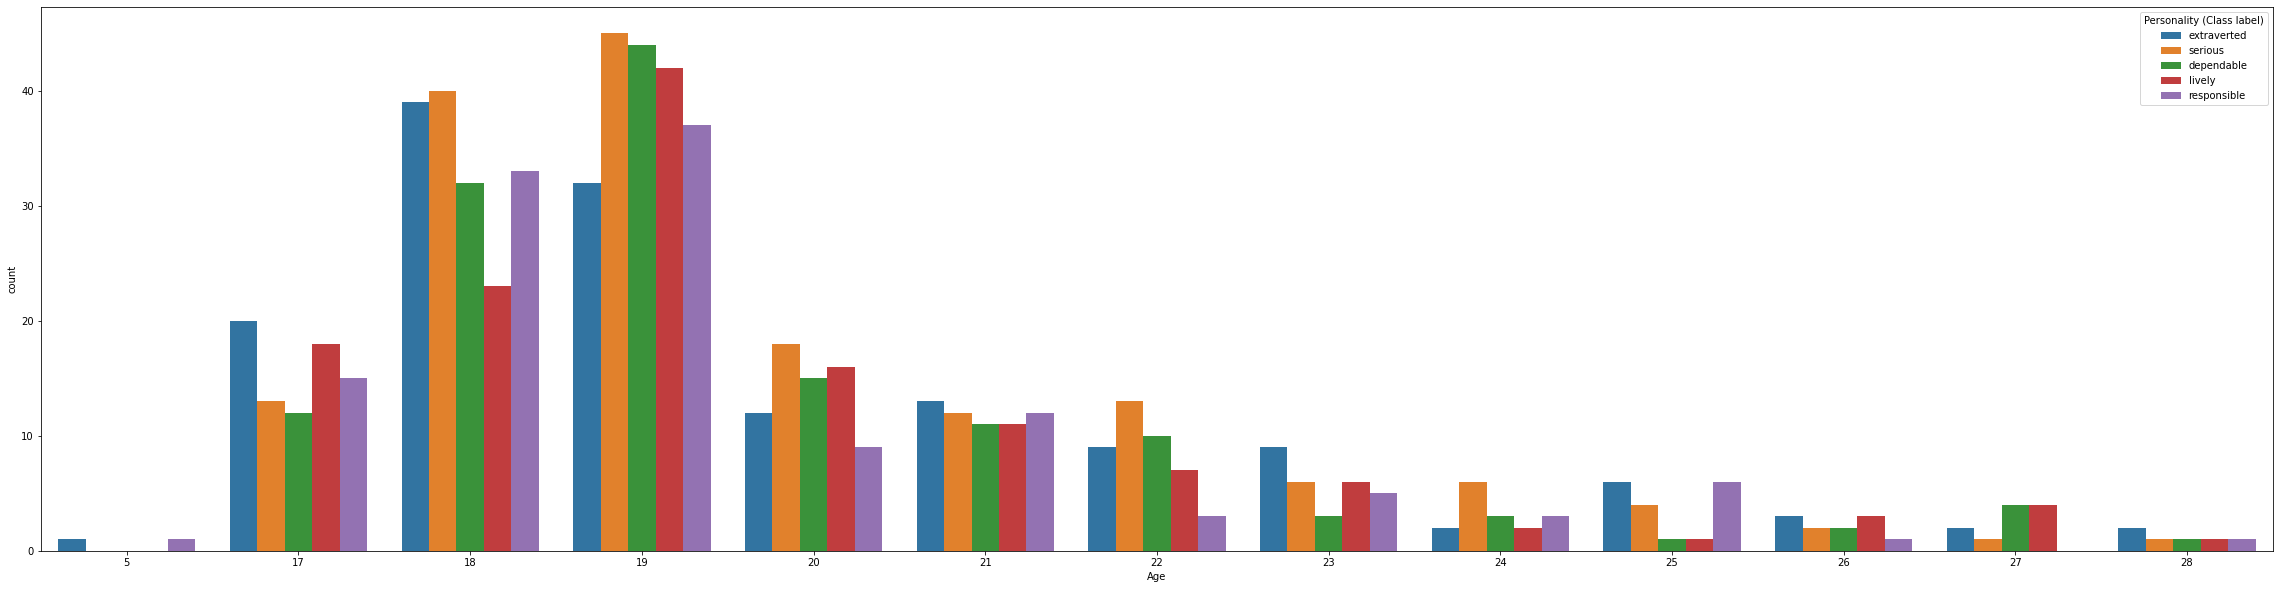

In [9]:
plt.figure(figsize=(40,10))

sns.countplot('Age',hue='Personality (Class label)',data=data)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


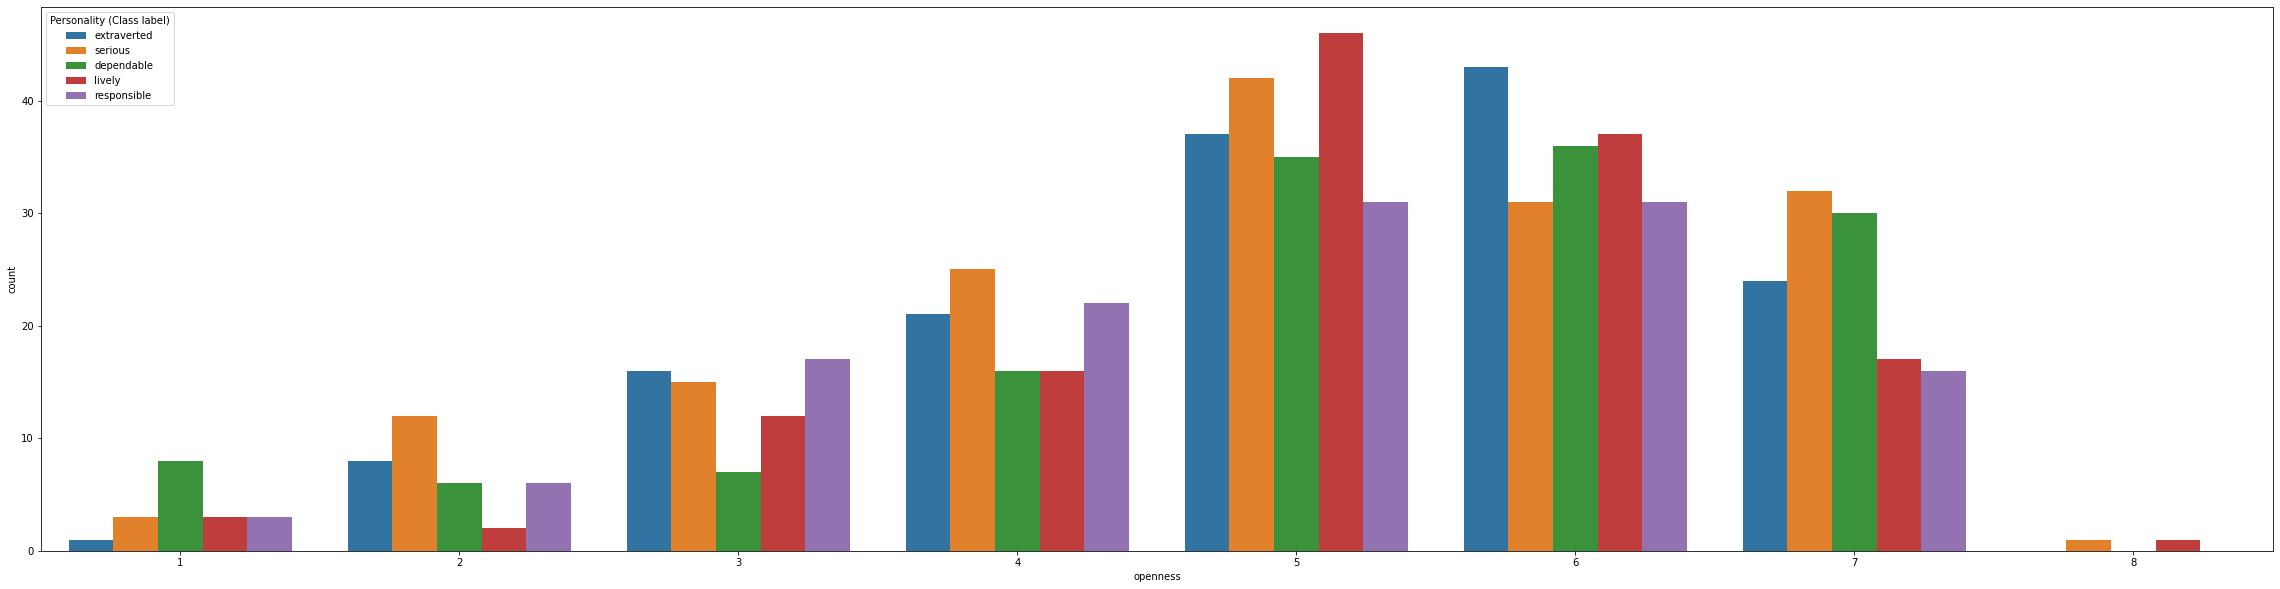

In [10]:
plt.figure(figsize=(40,10))
sns.countplot('openness',hue='Personality (Class label)',data=data)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


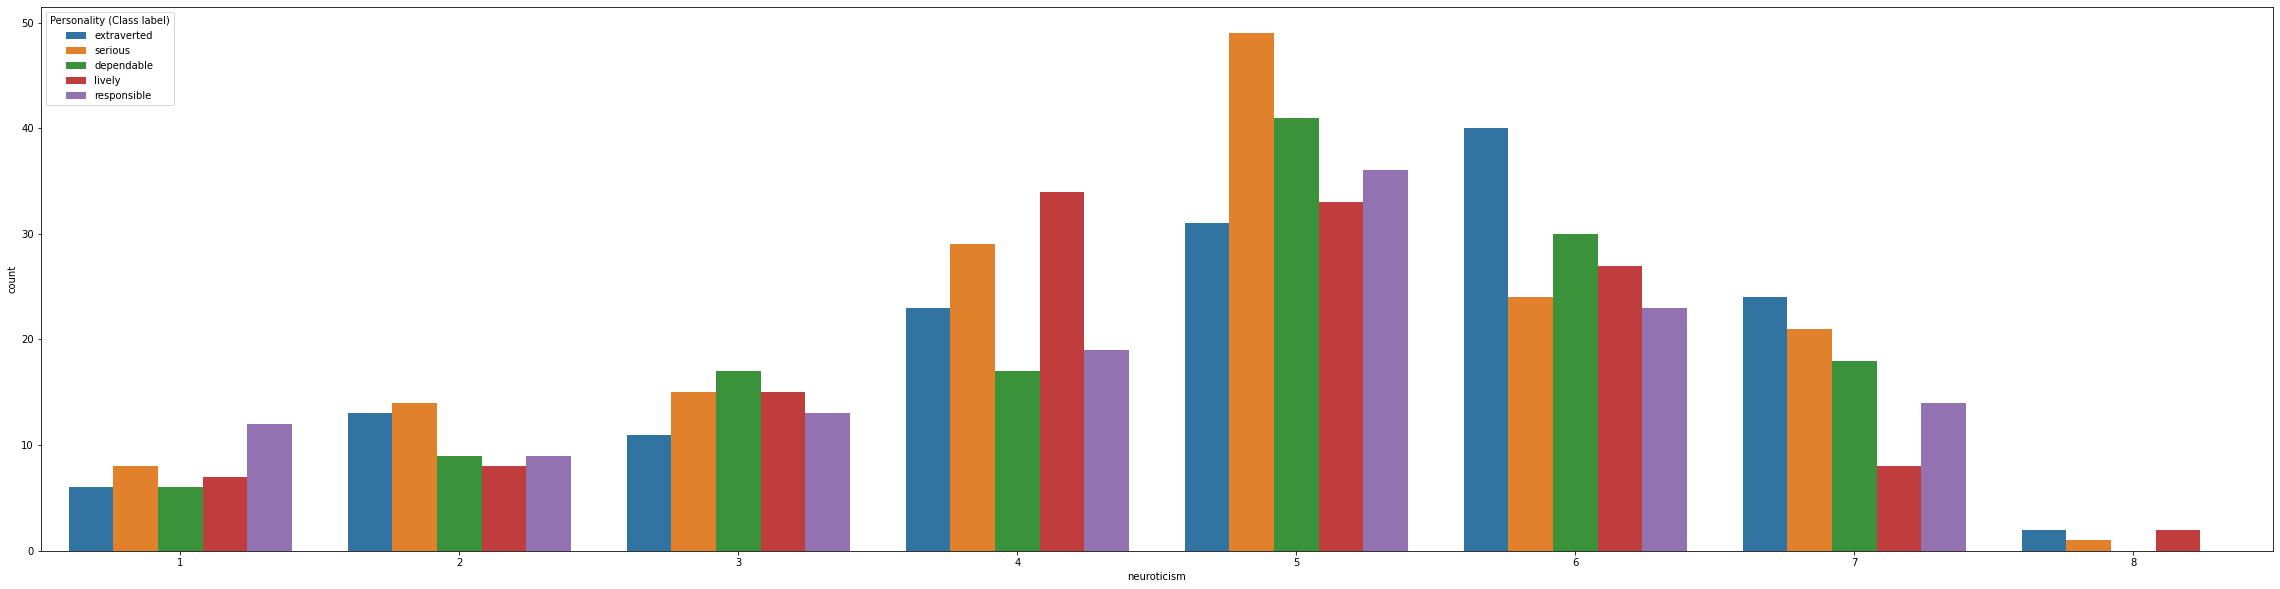

In [11]:
plt.figure(figsize=(40,10))
sns.countplot('neuroticism',hue='Personality (Class label)',data=data)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


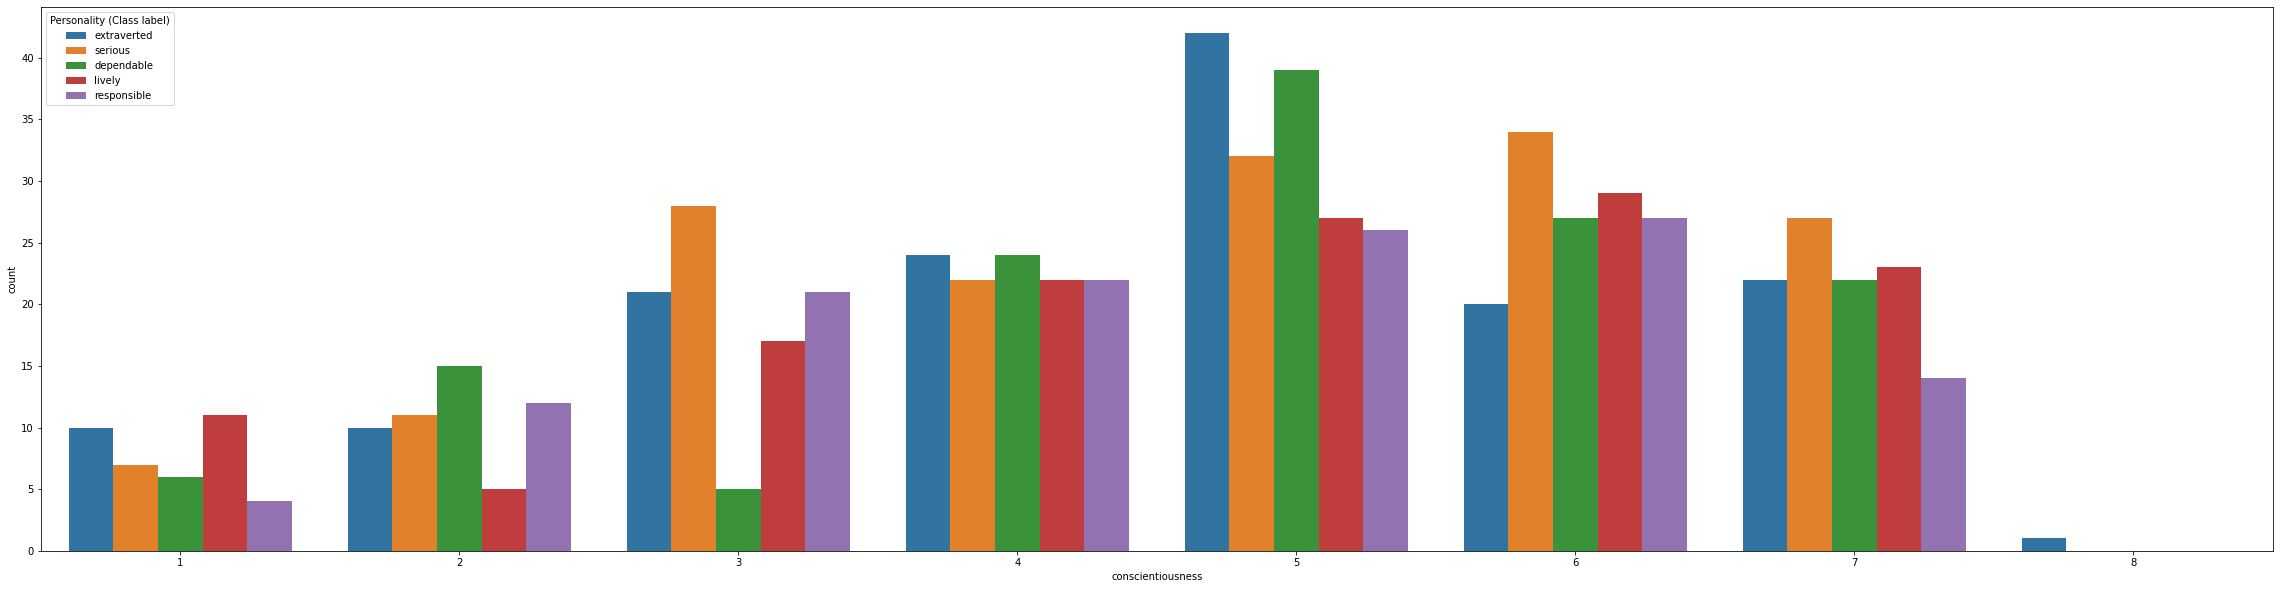

In [12]:
plt.figure(figsize=(40,10))
sns.countplot('conscientiousness',hue='Personality (Class label)',data=data)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


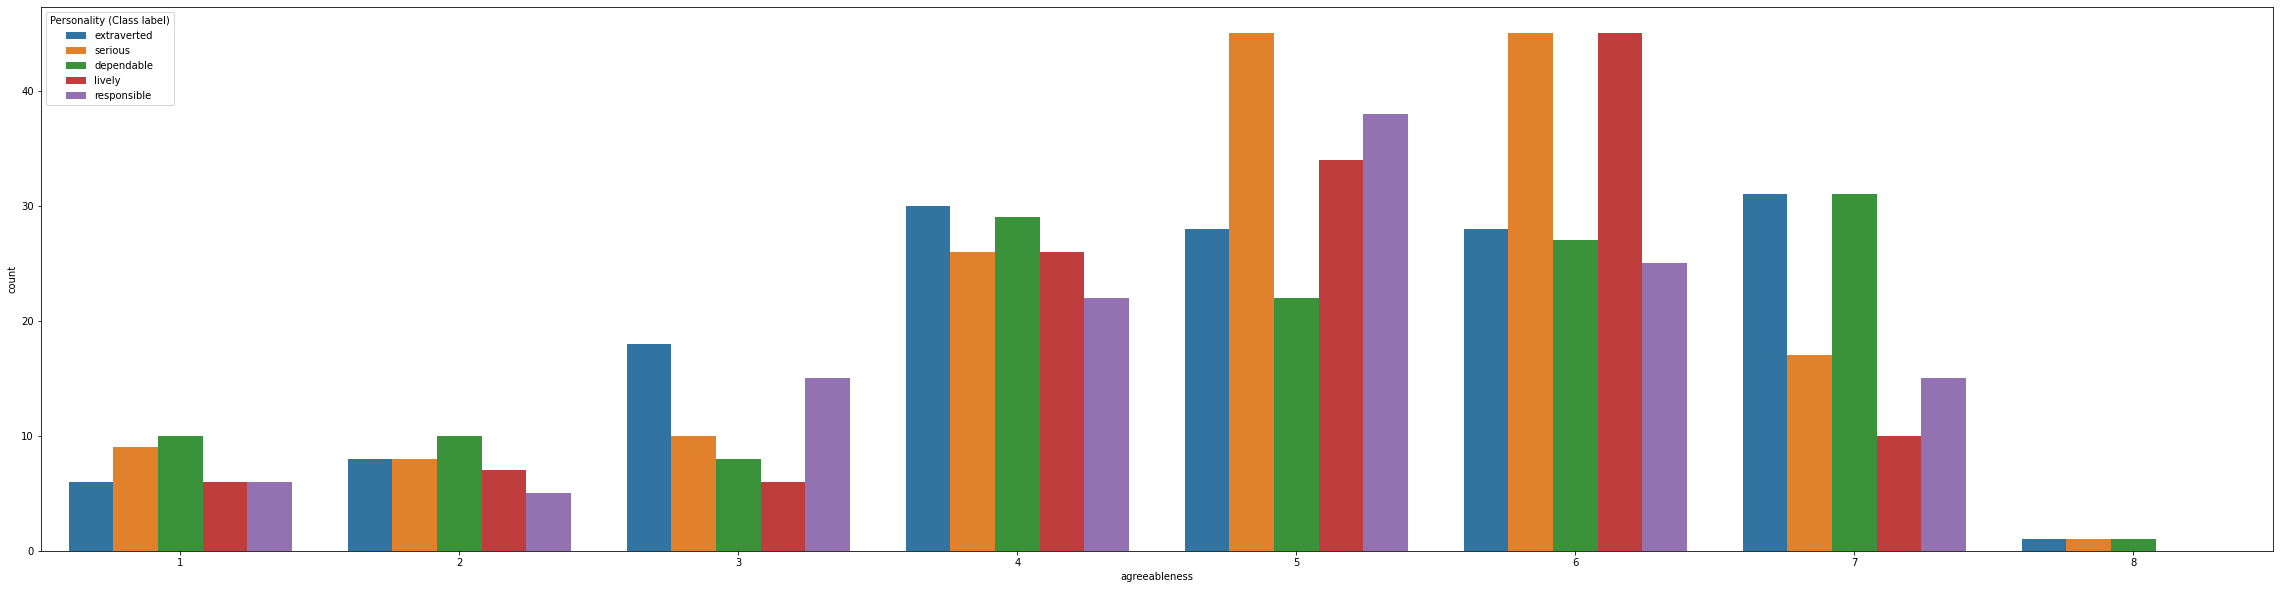

In [13]:
plt.figure(figsize=(40,10))
sns.countplot('agreeableness',hue='Personality (Class label)',data=data)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


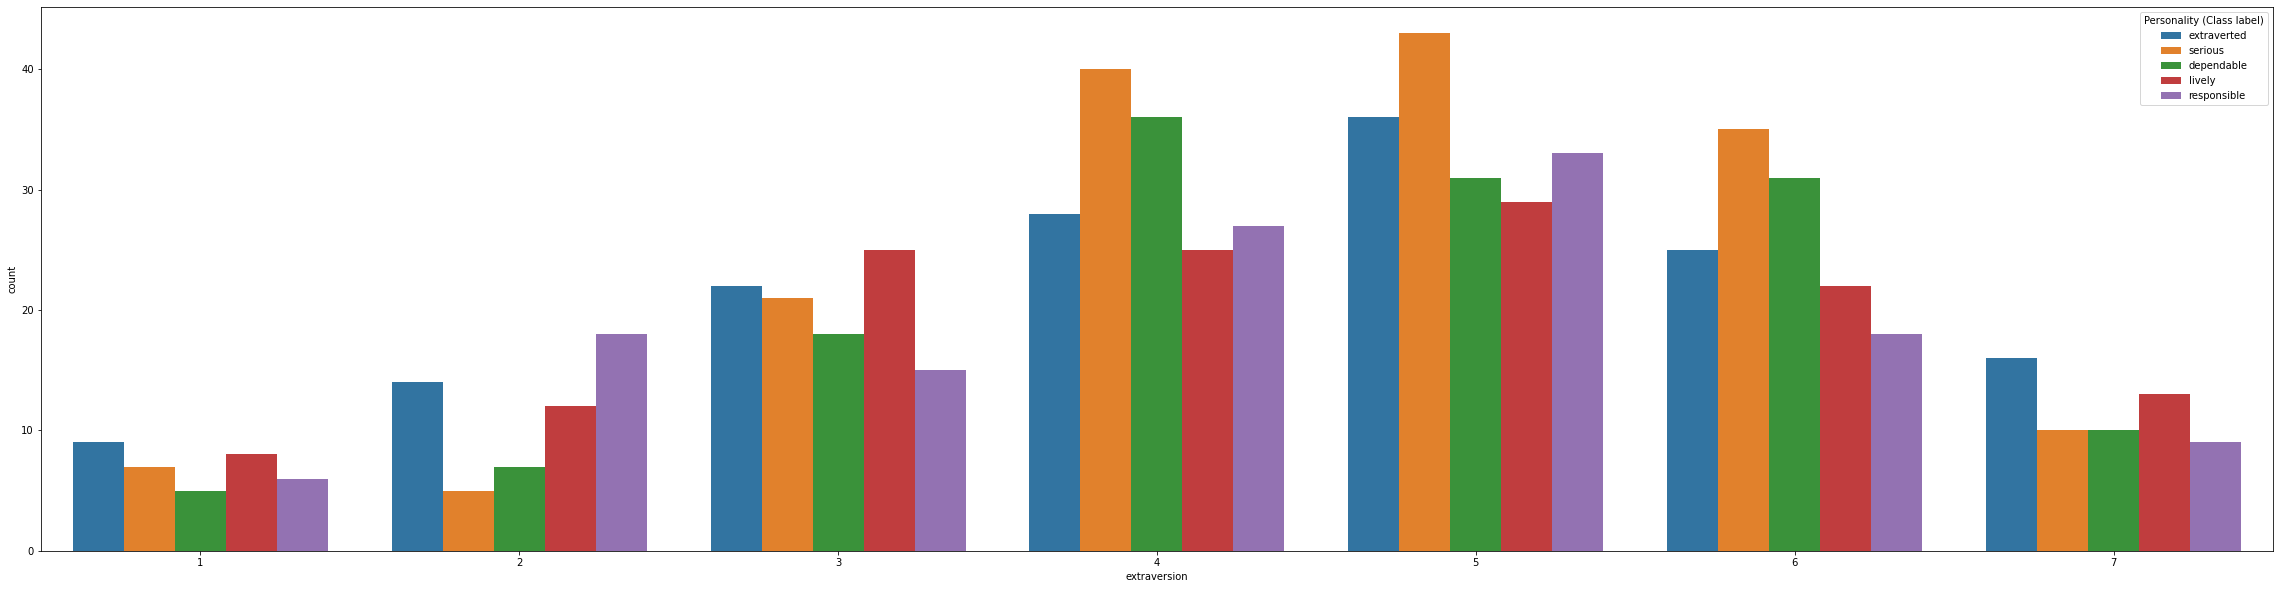

In [14]:
plt.figure(figsize=(40,10))
sns.countplot('extraversion',hue='Personality (Class label)',data=data)
plt.show()

Even from these above plots one can note that maximum people fall under 5- level of different features

In [15]:
array = data.values
for i in range(len(array)):
	if array[i][0]=="Male":
		array[i][0]=1
	else:
		array[i][0]=0

In [16]:
df=pd.DataFrame(array)

maindf =df[[0,1,2,3,4,5,6]]
mainarray=maindf.values
print (mainarray)

[[1 17 7 ... 7 3 2]
 [1 19 4 ... 4 6 6]
 [0 18 7 ... 4 5 5]
 ...
 [1 22 5 ... 3 6 1]
 [1 19 5 ... 5 7 5]
 [0 18 5 ... 7 6 5]]


In [17]:
temp=df[7]
train_y =temp.values
# print(train_y)
# print(mainarray)
train_y=temp.values

for i in range(len(train_y)):
	train_y[i] =str(train_y[i])

In [18]:
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter =1000)
mul_lr.fit(mainarray, train_y)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg')

In [19]:
testdata =pd.read_csv('D:/All_datasets/Personality Prediction/test.csv')
test = testdata.values

In [20]:
testdata.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible


In [21]:
for i in range(len(test)):
	if test[i][0]=="Male":
		test[i][0]=1
	else:
		test[i][0]=0

In [22]:
testdata.shape

(315, 8)

In [23]:
testdata = testdata.rename({
          "Personality (class label)":"Personality"
        }, axis='columns')

In [24]:
test_y=testdata["Personality"]

In [25]:
df1=pd.DataFrame(test)

testdf =df1[[0,1,2,3,4,5,6]]
maintestarray=testdf.values
print(maintestarray)

[[0 20 7 ... 9 5 5]
 [1 17 5 ... 5 2 4]
 [0 25 5 ... 7 2 4]
 ...
 [1 18 7 ... 6 2 7]
 [1 23 6 ... 5 4 3]
 [0 18 5 ... 3 5 6]]


In [26]:
y_pred = mul_lr.predict(maintestarray)
for i in range(len(y_pred)) :
	y_pred[i]=str((y_pred[i]))

In [29]:
from sklearn import metrics
print('The accuracy of Model is: ', metrics.accuracy_score(y_pred, test_y))

The accuracy of Model is:  0.8571428571428571


In [28]:
DF = pd.DataFrame(y_pred,columns=['Predicted Personality'])
DF.index=DF.index+1
DF.index.names = ['Person No']
DF.to_csv("output.csv")